# Master Catalog
## A notebook to merge and do some catalog stats for all events in YP

In [1]:
import os
import sys
## This code block tells the notebook to find paths above it, 
# meaning modules above 'notebooks/' are now visible and can be imported.
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
## subsequent imports    
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 15, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    'font.size': 15, # was 10
    'legend.fontsize': 10, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'serif',
    'svg.fonttype': 'none'
}
matplotlib.rcParams.update(params)

Global variables.

In [2]:
# PDIR = "/uufs/chpc.utah.edu/common/home/koper-group2/jholt/Yellowstone/Local_Magnitude_Study/NonParaInvRedux"

# legacyCatPath = f"{PDIR}/catalogs/events/oldevids.yellowstone.cat"
# currentCatPath = f"{PDIR}/catalogs/events/newevids.yellowstone.cat"

CatPath = f"../catalogs/events/yellowstone.catalog.all"

Functions

In [3]:
def extract_time_period_event_totals(df: pd.DataFrame, minDate: pd.Timestamp, maxDate: pd.Timestamp, freq: str = 'Y') -> np.array:
    """
    
    """
    
    py = pd.date_range(minDate, maxDate, freq=freq)

    totals = np.zeros(len(py)-1)
    for i, y in enumerate(py[:-1]):
        tmp_total = len(df[((df.Date<=py[i+1])&(df.Date>y))])
        totals[i] = tmp_total
        
    return totals

def plot_event_totals(totals: np.array, minDate: pd.Timestamp, maxDate: pd.Timestamp, freq: str = 'Y') -> None:
    """
    
    """
    mu = np.mean(totals)
    std = np.std(totals)
    
    py = pd.date_range(minDate, maxDate, freq=freq)
    py += pd.to_timedelta(52/2, 'W')  
    
    plt.step(py[:-1], totals, color='k')
#     plt.plot(py[:-1], totals, 'k')
    plt.hlines(mu, py[0], py[-2], color='r', linestyles='dashed', lw=2, label=f"annual mean: {int(np.rint(mu))}")
    plt.hlines(mu+std, py[0], py[-2], color='k', linestyles='dashed', lw=1, label=f"annual std dv: {int(np.rint(std))}")
    plt.hlines(mu-std, py[0], py[-2], color='k', linestyles='dashed', lw=1)
    plt.xlabel("Year")
    plt.ylabel("No. of Events")
    plt.legend()
    
    

    

In [4]:
# leg = pd.read_csv(legacyCatPath, delim_whitespace=True, skiprows=[1,])
# cur = pd.read_csv(currentCatPath, delim_whitespace=True, skiprows=[1,])
# total = pd.concat([leg, cur])
total = pd.read_csv(CatPath, delim_whitespace=True)

What is the catalog total?

In [5]:
totaleqs = len(total) ; totaleqs

46689

What is the total with at least one Magnitude value?
Dummy cells are assinged '-9.99' if there isn't an entry for either ML or MC (or both).
-9.99 - -9.99 = 0, therefore cells with 0 have neither an ML nor an MC.

In [6]:
total_quotable = total[(total.ML - total.MC) != 0]; len(total_quotable)

46090

What is the min, max ML or MC value for the catalog with at least one magnitude assignment per event.

In [7]:
ml = total_quotable[total_quotable.ML != -9.99].ML.min(), total_quotable.ML.max()
mc = total_quotable[total_quotable.ML != -9.99].ML.min(), total_quotable.ML.max()
np.min([ml, mc]), np.max([ml, mc])

(0.01, 4.83)

What is the range of dates for said catalog?

In [8]:
total_quotable.Date.min(), total_quotable.Date.max()

('1983-05-02', '2020-06-30')

Convert the 'Date' column to Timestamps so we can iterate through them meaninfully.

In [9]:
total.Date = pd.to_datetime(total.Date)

What are the annual totals of events for all time?
Visualise and save the output. 
<br>
NOTE: We want to find a period where there is no apparent increase due to increased instrumentation coverage.

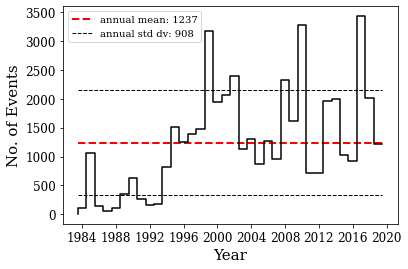

In [10]:
minDate = pd.to_datetime("1982-01-01") # when using pd.date_range you have to start a year before for some reason.
maxDate = pd.to_datetime("2019-12-31")
## numpy array containing yearly event totals - time period can be changed by freq, but no less than 1 day.
## 1 day is minimum because Date column is only informative to a given day (e.g. 2020/01/01).
totals = extract_time_period_event_totals(total, minDate, maxDate, freq="Y")
plot_event_totals(totals, minDate, maxDate, freq='Y')
plt.savefig(f"../figures/all-time-annual.pdf", transparent=True)

What are the annual totals of events between the start of 2000 and the end of 2019?
Visualise and save the output.

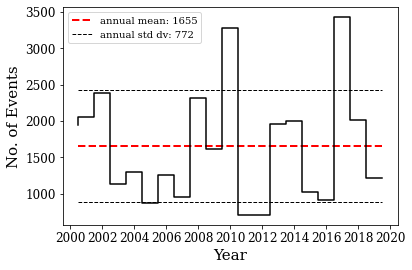

In [11]:
minDate = pd.to_datetime("1999-01-01") # when using pd.date_range you have to start a year before for some reason.
maxDate = pd.to_datetime("2019-12-31")
## numpy array containing yearly event totals - time period can be changed by freq, but no less than 1 day.
## 1 day is minimum because Date column is only informative to a given day (e.g. 2020/01/01).
totals = extract_time_period_event_totals(total, minDate, maxDate, freq="Y")
# plt.close()
plot_event_totals(totals, minDate, maxDate, freq='Y')
plt.savefig(f"../figures/twenty-year-annual.pdf", transparent=True)

In [12]:
## subset events by those recorded only in 2019
minDate, maxDate = pd.to_datetime("2019-01-01"), ("2019-12-31")
twtyntn = total[((total.Date<=maxDate)&(total.Date>=minDate))]

In 2019, how many events were assinged an ML of the total that were recoreded?

In [13]:
withml = twtyntn[twtyntn.ML != -9.99]
no_all, no_w_ml = len(twtyntn), len(withml)
pct = no_w_ml/no_all * 100

print(f"In 2019, {no_w_ml} out of {no_all} events were assinged an ML.")
print(f"This equates to {pct:.2f}% of the catalog having an ML assigned in 2019.")

In 2019, 486 out of 1218 events were assinged an ML.
This equates to 39.90% of the catalog having an ML assigned in 2019.


And the same for MC.

In [14]:
withmc = twtyntn[twtyntn.MC != -9.99]

no_all, no_w_mc = len(twtyntn), len(withmc)
pct = no_w_mc/no_all * 100

print(f"In 2019, {no_w_mc} out of {no_all} events were assinged an MC.")
print(f"This equates to {pct:.2f}% of the catalog having an MC assigned in 2019.")

In 2019, 724 out of 1218 events were assinged an MC.
This equates to 59.44% of the catalog having an MC assigned in 2019.


And how many with no magnitude assigned?

In [15]:
nomag = twtyntn[twtyntn.MC - twtyntn.ML == 0]

no_all, no_mag = len(twtyntn), len(nomag)
pct = no_mag/no_all * 100

print(f"In 2019, {no_mag} out of {no_all} events were assinged at least one magntiude type.")
print(f"This equates to {pct:.2f}% of the catalog having neither an ML or an MC assinged in 2019.")

In 2019, 8 out of 1218 events were assinged at least one magntiude type.
This equates to 0.66% of the catalog having neither an ML or an MC assinged in 2019.


And how many with both?

In [16]:
bothmag = twtyntn[(twtyntn.MC != -9.99) & (twtyntn.ML != -9.99)]
no_all, both_mag = len(twtyntn), len(bothmag)
pct = both_mag/no_all * 100

print(f"In 2019, {both_mag} out of {no_all} events were assinged an MC.")
print(f"This equates to {pct:.2f}% of the catalog having an ML and an MC assigned in 2019.")

In 2019, 0 out of 1218 events were assinged an MC.
This equates to 0.00% of the catalog having an ML and an MC assigned in 2019.


In [22]:
total[total.Dep==total.Dep.min()].Dmin/total[total.Dep==total.Dep.min()].Dep

38237   -3.724928
dtype: float64